In [6]:
import rasterio as rio
from matplotlib import pyplot as pyplot
import sys
import os.path
import shapely
import numpy as np

import sys
import skimage.io
import skimage.viewer

# next time: have a histogram (afk so send screenshot + link)

In [7]:
def import_tif(filename):
    # context managers2
    # with rio.open(tif) as src:
    #   var1 = ...
    #   var2 = ...
    #   return var1, var2
    # filename: filename to import from ./data/, or an absolute path
    
    if '\\' in filename or '/' in filename:
        return rio.open(filename)
    
    base_path = sys.path[0]
    data_folder = 'all_data'
    abs_file_path = os.path.join(base_path, data_folder, filename)
    return rio.open(abs_file_path)



In [ ]:

planet_ex = import_tif("20190925_174105_05_105c_3B_AnalyticMS_SR.tif")
landsat_ex = import_tif("LC08_L1TP_033032_20190927_20191017_01_T1_B6.TIF")
planet_arr = planet_ex.read(1) / 10000
landsat_arr = landsat_ex.read(1) / 10000

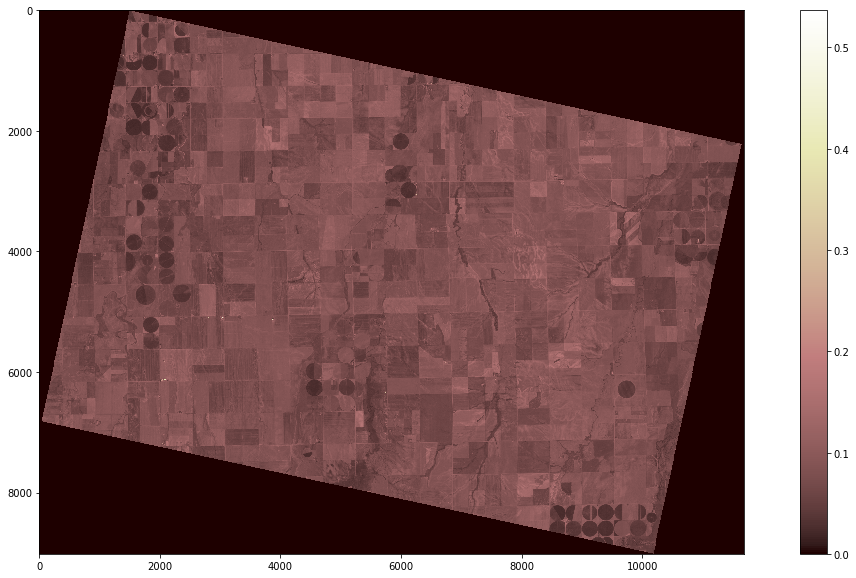

In [8]:
pyplot.figure(figsize=(20,10))

pyplot.imshow(planet_arr, cmap='pink')
pyplot.colorbar()
pyplot.show()

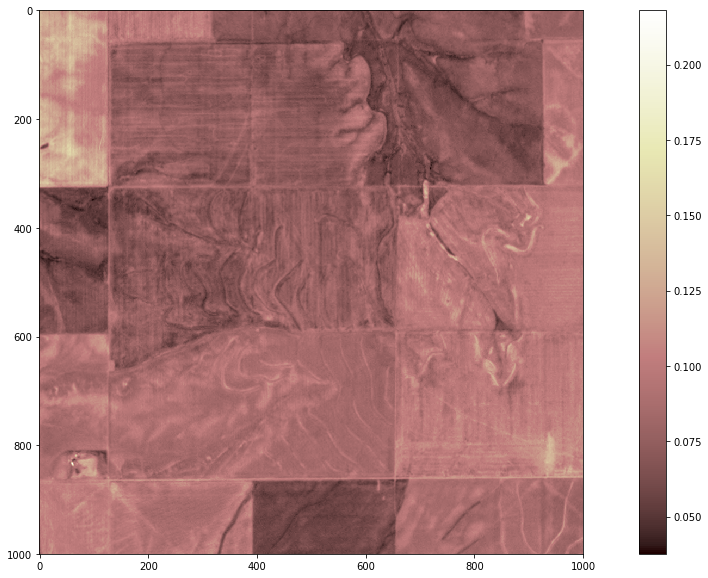

In [9]:
crop = planet_arr[2000:3000,4000:5000]
pyplot.figure(figsize=(20,10))

pyplot.imshow(crop, cmap='pink')
pyplot.colorbar()
pyplot.show()

In [10]:
type(planet_arr)
planet_arr.shape

(9017, 11684)

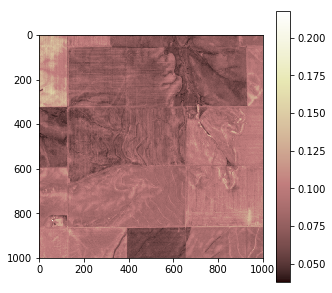

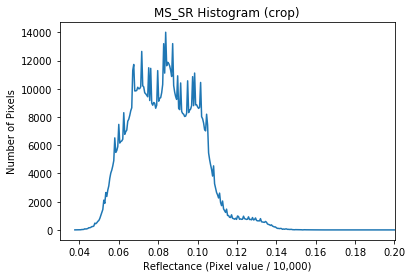

In [11]:
histogram, bin_edges = np.histogram(crop, bins='auto')

pyplot.figure(figsize=(5,5))

pyplot.imshow(crop, cmap='pink')
pyplot.colorbar()
pyplot.show()

plt.title("MS_SR Histogram (crop)")
plt.xlabel("Reflectance (Pixel value / 10,000)")
plt.ylabel("Number of Pixels")
plt.xlim([0.03, 0.2])#- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()


In [12]:
profile = src.profile
profile.keys()
affine = profile['transform']
affine
# affine transform geospatial image. generally:
#[pixel size x, 0, lat 
# 0, pixel size y, long]
# mask 0's out 
# maskarray module

# get important xml data out
# make a mask for each and apply them all to eachother

NameError: name 'src' is not defined

In [13]:
planet_ex.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 11684, 'height': 9017, 'count': 4, 'crs': CRS.from_dict(init='epsg:32613'), 'transform': Affine(3.0, 0.0, 544056.0,
       0.0, -3.0, 4438248.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}